# 参数更新方法比较

https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/optimizer_compare_naive.py

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为导入父目录中的文件而进行的设置
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

<Figure size 640x480 with 4 Axes>

# mnist数据集更新比较

https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/optimizer_compare_mnist.py

===========iteration:0===========
SGD:2.334071385208264
Momentum:2.3691778464717386
AdaGrad:3.169372953589367
Adam:2.2011890132976264
===========iteration:100===========
SGD:1.4248168695192494
Momentum:0.31381358248406654
AdaGrad:0.11412993203654723
Adam:0.24216233513729085
===========iteration:200===========
SGD:0.5983810929704139
Momentum:0.4193872941690091
AdaGrad:0.1819726014208852
Adam:0.23314478640111336
===========iteration:300===========
SGD:0.4424090664903332
Momentum:0.19427584746049806
AdaGrad:0.0668455189784197
Adam:0.10032031222276981
===========iteration:400===========
SGD:0.4095452120324918
Momentum:0.20159765853772652
AdaGrad:0.06202351203384572
Adam:0.1335064808595999
===========iteration:500===========
SGD:0.3751587932274521
Momentum:0.14034947157815764
AdaGrad:0.07750560336402089
Adam:0.08128458684738674
===========iteration:600===========
SGD:0.28754545224331907
Momentum:0.10269764729117203
AdaGrad:0.05968246737943076
Adam:0.11412910828318369
===========iteration:70

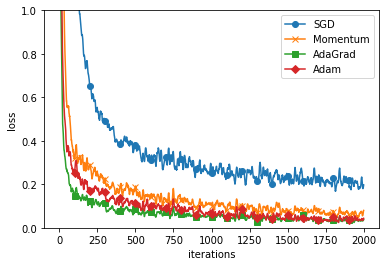

In [2]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 为导入父目录中的文件而进行的设置
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:设置实验信息==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

# 激活值的分布

https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/weight_init_activation_histogram.py

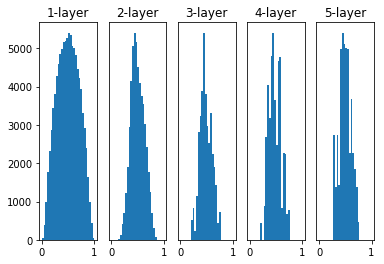

In [3]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000个数据
node_num = 100  # 各隐藏层节点（神经元）的数量
hidden_layer_size = 5  # 隐藏层有5层
activations = {}  # 在这里保存激活值的结果

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 尝试用不同的初始值进行实验！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 也试着换一下激活函数的种类来进行实验！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 绘制直方图
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# 权重初始值比较

https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/weight_init_compare.py

===========iteration:0===========
std=0.01:2.302515471747407
Xavier:2.3210003557046237
He:2.31333297008918
===========iteration:100===========
std=0.01:2.301834959898998
Xavier:2.275458209893899
He:1.5594900644256335
===========iteration:200===========
std=0.01:2.2994267994287982
Xavier:2.2159686513659267
He:0.714738618948348
===========iteration:300===========
std=0.01:2.300657306509801
Xavier:2.0317902208198975
He:0.5849956916013709
===========iteration:400===========
std=0.01:2.3022105726734345
Xavier:1.6909635184185434
He:0.483001107020099
===========iteration:500===========
std=0.01:2.302351213583918
Xavier:1.2662492346690404
He:0.34994905591474745
===========iteration:600===========
std=0.01:2.301572125596412
Xavier:0.844339446861255
He:0.30199587729025995
===========iteration:700===========
std=0.01:2.3007649916057105
Xavier:0.7537531841031204
He:0.4008446787556119
===========iteration:800===========
std=0.01:2.299754334461919
Xavier:0.5227419586481694
He:0.2675401624045456
====

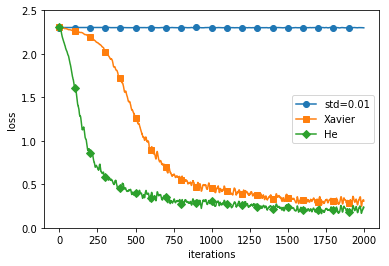

In [4]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 为导入父目录中的文件而进行的设置
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:设置实验信息==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 使用 Batch Norm后的效果

https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/batch_norm_test.py

============== 1/16 ==============
epoch:0 | 0.117 - 0.098
epoch:1 | 0.097 - 0.087


C:\Users\teimeichi\deeplearning_from_scratch\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
C:\Users\teimeichi\deeplearning_from_scratch\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\teimeichi\deeplearning_from_scratch\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:2 | 0.097 - 0.123
epoch:3 | 0.097 - 0.14
epoch:4 | 0.097 - 0.156
epoch:5 | 0.097 - 0.187
epoch:6 | 0.097 - 0.216
epoch:7 | 0.097 - 0.229
epoch:8 | 0.097 - 0.255
epoch:9 | 0.097 - 0.283
epoch:10 | 0.097 - 0.296
epoch:11 | 0.097 - 0.316
epoch:12 | 0.097 - 0.33
epoch:13 | 0.097 - 0.348
epoch:14 | 0.097 - 0.371
epoch:15 | 0.097 - 0.381
epoch:16 | 0.097 - 0.399
epoch:17 | 0.097 - 0.403


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.419
epoch:19 | 0.097 - 0.43
============== 2/16 ==============


C:\Users\teimeichi\deeplearning_from_scratch\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:0 | 0.092 - 0.091
epoch:1 | 0.097 - 0.078
epoch:2 | 0.097 - 0.127
epoch:3 | 0.097 - 0.14
epoch:4 | 0.097 - 0.164
epoch:5 | 0.097 - 0.186
epoch:6 | 0.097 - 0.202
epoch:7 | 0.097 - 0.233
epoch:8 | 0.097 - 0.263
epoch:9 | 0.097 - 0.287
epoch:10 | 0.097 - 0.312
epoch:11 | 0.097 - 0.333
epoch:12 | 0.097 - 0.363
epoch:13 | 0.097 - 0.386
epoch:14 | 0.097 - 0.402
epoch:15 | 0.097 - 0.419
epoch:16 | 0.097 - 0.447
epoch:17 | 0.097 - 0.459
epoch:18 | 0.097 - 0.479
epoch:19 | 0.097 - 0.492


No handles with labels found to put in legend.


============== 3/16 ==============
epoch:0 | 0.097 - 0.103
epoch:1 | 0.325 - 0.117
epoch:2 | 0.49 - 0.15
epoch:3 | 0.587 - 0.186
epoch:4 | 0.651 - 0.216
epoch:5 | 0.729 - 0.25
epoch:6 | 0.783 - 0.297
epoch:7 | 0.799 - 0.322
epoch:8 | 0.847 - 0.357
epoch:9 | 0.885 - 0.388
epoch:10 | 0.909 - 0.417
epoch:11 | 0.919 - 0.449
epoch:12 | 0.935 - 0.473
epoch:13 | 0.948 - 0.503
epoch:14 | 0.956 - 0.532
epoch:15 | 0.961 - 0.55
epoch:16 | 0.974 - 0.577
epoch:17 | 0.981 - 0.596
epoch:18 | 0.983 - 0.604


No handles with labels found to put in legend.


epoch:19 | 0.987 - 0.626
============== 4/16 ==============
epoch:0 | 0.082 - 0.073
epoch:1 | 0.246 - 0.09
epoch:2 | 0.36 - 0.187
epoch:3 | 0.432 - 0.261
epoch:4 | 0.499 - 0.324
epoch:5 | 0.564 - 0.391
epoch:6 | 0.616 - 0.454
epoch:7 | 0.66 - 0.504
epoch:8 | 0.68 - 0.543
epoch:9 | 0.706 - 0.58
epoch:10 | 0.73 - 0.61
epoch:11 | 0.751 - 0.635
epoch:12 | 0.759 - 0.663
epoch:13 | 0.774 - 0.678
epoch:14 | 0.782 - 0.701
epoch:15 | 0.795 - 0.719
epoch:16 | 0.811 - 0.739
epoch:17 | 0.824 - 0.755
epoch:18 | 0.824 - 0.769
epoch:19 | 0.831 - 0.782


No handles with labels found to put in legend.


============== 5/16 ==============
epoch:0 | 0.096 - 0.098
epoch:1 | 0.106 - 0.119
epoch:2 | 0.114 - 0.273
epoch:3 | 0.116 - 0.408
epoch:4 | 0.121 - 0.489
epoch:5 | 0.129 - 0.543
epoch:6 | 0.136 - 0.592
epoch:7 | 0.15 - 0.64
epoch:8 | 0.155 - 0.687
epoch:9 | 0.166 - 0.703
epoch:10 | 0.182 - 0.736
epoch:11 | 0.202 - 0.755
epoch:12 | 0.217 - 0.784
epoch:13 | 0.216 - 0.808
epoch:14 | 0.228 - 0.819
epoch:15 | 0.234 - 0.837
epoch:16 | 0.253 - 0.845
epoch:17 | 0.249 - 0.851
epoch:18 | 0.26 - 0.856


No handles with labels found to put in legend.


epoch:19 | 0.281 - 0.864
============== 6/16 ==============
epoch:0 | 0.101 - 0.113
epoch:1 | 0.149 - 0.176
epoch:2 | 0.128 - 0.378
epoch:3 | 0.115 - 0.574
epoch:4 | 0.118 - 0.668
epoch:5 | 0.116 - 0.717
epoch:6 | 0.114 - 0.763
epoch:7 | 0.116 - 0.798
epoch:8 | 0.114 - 0.818
epoch:9 | 0.116 - 0.834
epoch:10 | 0.115 - 0.85
epoch:11 | 0.114 - 0.864
epoch:12 | 0.116 - 0.877
epoch:13 | 0.116 - 0.886
epoch:14 | 0.116 - 0.897
epoch:15 | 0.116 - 0.909
epoch:16 | 0.115 - 0.922
epoch:17 | 0.116 - 0.933
epoch:18 | 0.116 - 0.935
epoch:19 | 0.116 - 0.94


No handles with labels found to put in legend.


============== 7/16 ==============
epoch:0 | 0.116 - 0.078
epoch:1 | 0.116 - 0.356
epoch:2 | 0.116 - 0.669
epoch:3 | 0.116 - 0.762
epoch:4 | 0.116 - 0.782
epoch:5 | 0.116 - 0.814
epoch:6 | 0.116 - 0.848
epoch:7 | 0.116 - 0.866
epoch:8 | 0.116 - 0.89
epoch:9 | 0.116 - 0.908
epoch:10 | 0.116 - 0.927
epoch:11 | 0.116 - 0.936
epoch:12 | 0.116 - 0.955
epoch:13 | 0.116 - 0.97
epoch:14 | 0.116 - 0.978
epoch:15 | 0.116 - 0.978
epoch:16 | 0.116 - 0.985
epoch:17 | 0.116 - 0.988
epoch:18 | 0.116 - 0.989


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.991
============== 8/16 ==============
epoch:0 | 0.1 - 0.097
epoch:1 | 0.116 - 0.361
epoch:2 | 0.116 - 0.625
epoch:3 | 0.116 - 0.706
epoch:4 | 0.116 - 0.755
epoch:5 | 0.116 - 0.815
epoch:6 | 0.116 - 0.873
epoch:7 | 0.116 - 0.917
epoch:8 | 0.116 - 0.943
epoch:9 | 0.116 - 0.961
epoch:10 | 0.116 - 0.978
epoch:11 | 0.116 - 0.984
epoch:12 | 0.116 - 0.987
epoch:13 | 0.116 - 0.989
epoch:14 | 0.116 - 0.996
epoch:15 | 0.116 - 0.998
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.999
============== 9/16 ==============
epoch:0 | 0.117 - 0.101
epoch:1 | 0.117 - 0.456
epoch:2 | 0.117 - 0.794
epoch:3 | 0.117 - 0.864
epoch:4 | 0.117 - 0.913
epoch:5 | 0.117 - 0.945
epoch:6 | 0.117 - 0.973
epoch:7 | 0.117 - 0.982
epoch:8 | 0.117 - 0.988
epoch:9 | 0.117 - 0.989
epoch:10 | 0.117 - 0.98
epoch:11 | 0.117 - 0.993
epoch:12 | 0.117 - 0.996
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.998
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 1.0
epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 10/16 ==============
epoch:0 | 0.117 - 0.157
epoch:1 | 0.117 - 0.423
epoch:2 | 0.117 - 0.759
epoch:3 | 0.117 - 0.812
epoch:4 | 0.117 - 0.868
epoch:5 | 0.117 - 0.891
epoch:6 | 0.117 - 0.937
epoch:7 | 0.117 - 0.954
epoch:8 | 0.117 - 0.977
epoch:9 | 0.117 - 0.987
epoch:10 | 0.117 - 0.986
epoch:11 | 0.117 - 0.991
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.988
epoch:14 | 0.117 - 0.994
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.995
epoch:17 | 0.117 - 0.996
epoch:18 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.998
============== 11/16 ==============
epoch:0 | 0.116 - 0.099
epoch:1 | 0.117 - 0.511
epoch:2 | 0.116 - 0.694
epoch:3 | 0.117 - 0.649
epoch:4 | 0.117 - 0.839
epoch:5 | 0.117 - 0.816
epoch:6 | 0.117 - 0.83
epoch:7 | 0.117 - 0.871
epoch:8 | 0.117 - 0.894
epoch:9 | 0.117 - 0.881
epoch:10 | 0.117 - 0.898
epoch:11 | 0.117 - 0.9
epoch:12 | 0.117 - 0.902
epoch:13 | 0.117 - 0.903
epoch:14 | 0.117 - 0.904
epoch:15 | 0.117 - 0.904
epoch:16 | 0.117 - 0.895
epoch:17 | 0.117 - 0.858


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.987
epoch:19 | 0.116 - 0.988
============== 12/16 ==============
epoch:0 | 0.117 - 0.122
epoch:1 | 0.116 - 0.586
epoch:2 | 0.116 - 0.613
epoch:3 | 0.116 - 0.667
epoch:4 | 0.117 - 0.714
epoch:5 | 0.117 - 0.717
epoch:6 | 0.116 - 0.739
epoch:7 | 0.116 - 0.744
epoch:8 | 0.116 - 0.755
epoch:9 | 0.116 - 0.734
epoch:10 | 0.116 - 0.783
epoch:11 | 0.116 - 0.789
epoch:12 | 0.116 - 0.796
epoch:13 | 0.116 - 0.767
epoch:14 | 0.116 - 0.797
epoch:15 | 0.116 - 0.738
epoch:16 | 0.116 - 0.725
epoch:17 | 0.116 - 0.721
epoch:18 | 0.116 - 0.801
epoch:19 | 0.116 - 0.798


No handles with labels found to put in legend.


============== 13/16 ==============
epoch:0 | 0.117 - 0.141
epoch:1 | 0.105 - 0.443
epoch:2 | 0.117 - 0.617
epoch:3 | 0.117 - 0.589
epoch:4 | 0.117 - 0.563
epoch:5 | 0.117 - 0.685
epoch:6 | 0.116 - 0.742
epoch:7 | 0.116 - 0.702
epoch:8 | 0.116 - 0.766
epoch:9 | 0.116 - 0.758
epoch:10 | 0.116 - 0.742
epoch:11 | 0.116 - 0.712
epoch:12 | 0.117 - 0.747
epoch:13 | 0.117 - 0.709
epoch:14 | 0.116 - 0.703
epoch:15 | 0.116 - 0.708
epoch:16 | 0.116 - 0.797
epoch:17 | 0.116 - 0.799
epoch:18 | 0.116 - 0.759


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.796
============== 14/16 ==============
epoch:0 | 0.117 - 0.186
epoch:1 | 0.099 - 0.413
epoch:2 | 0.117 - 0.378
epoch:3 | 0.117 - 0.52
epoch:4 | 0.117 - 0.549
epoch:5 | 0.117 - 0.569
epoch:6 | 0.117 - 0.572
epoch:7 | 0.117 - 0.578
epoch:8 | 0.117 - 0.584
epoch:9 | 0.117 - 0.592
epoch:10 | 0.117 - 0.593
epoch:11 | 0.117 - 0.6
epoch:12 | 0.117 - 0.591
epoch:13 | 0.117 - 0.596
epoch:14 | 0.116 - 0.601
epoch:15 | 0.117 - 0.6
epoch:16 | 0.117 - 0.602
epoch:17 | 0.117 - 0.602
epoch:18 | 0.117 - 0.602


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.582
============== 15/16 ==============
epoch:0 | 0.087 - 0.097
epoch:1 | 0.116 - 0.316
epoch:2 | 0.116 - 0.395
epoch:3 | 0.117 - 0.477
epoch:4 | 0.117 - 0.478
epoch:5 | 0.117 - 0.51
epoch:6 | 0.117 - 0.568
epoch:7 | 0.117 - 0.595
epoch:8 | 0.117 - 0.588
epoch:9 | 0.117 - 0.602
epoch:10 | 0.117 - 0.602
epoch:11 | 0.117 - 0.593
epoch:12 | 0.117 - 0.585
epoch:13 | 0.117 - 0.601
epoch:14 | 0.117 - 0.605
epoch:15 | 0.117 - 0.602
epoch:16 | 0.117 - 0.61
epoch:17 | 0.117 - 0.611
epoch:18 | 0.117 - 0.604


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.602
============== 16/16 ==============
epoch:0 | 0.087 - 0.088
epoch:1 | 0.117 - 0.285
epoch:2 | 0.117 - 0.337
epoch:3 | 0.117 - 0.398
epoch:4 | 0.117 - 0.4
epoch:5 | 0.117 - 0.388
epoch:6 | 0.117 - 0.395
epoch:7 | 0.117 - 0.404
epoch:8 | 0.117 - 0.411
epoch:9 | 0.117 - 0.41
epoch:10 | 0.117 - 0.42
epoch:11 | 0.117 - 0.416
epoch:12 | 0.117 - 0.412
epoch:13 | 0.117 - 0.421
epoch:14 | 0.117 - 0.426
epoch:15 | 0.117 - 0.435
epoch:16 | 0.117 - 0.439
epoch:17 | 0.117 - 0.463
epoch:18 | 0.117 - 0.458
epoch:19 | 0.117 - 0.492


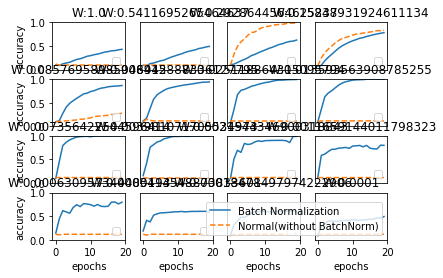

In [5]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为导入父目录中的文件而进行的设置
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 减少学习数据
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.绘制图形==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

# 检查Batch Norm梯度

https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/batch_norm_gradient_check.py

In [6]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为导入父目录中的文件而进行的设置
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.04921507676547421
W3:0.0
b3:1.7990402263745597e-07


# 过拟合

https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/overfit_weight_decay.py

epoch:0, train acc:0.11, test acc:0.1008
epoch:1, train acc:0.11, test acc:0.1008
epoch:2, train acc:0.11333333333333333, test acc:0.1013
epoch:3, train acc:0.12, test acc:0.102
epoch:4, train acc:0.12333333333333334, test acc:0.1027
epoch:5, train acc:0.12, test acc:0.1015
epoch:6, train acc:0.13, test acc:0.1034
epoch:7, train acc:0.13333333333333333, test acc:0.1045
epoch:8, train acc:0.13333333333333333, test acc:0.1071
epoch:9, train acc:0.14333333333333334, test acc:0.111
epoch:10, train acc:0.14333333333333334, test acc:0.1152
epoch:11, train acc:0.15666666666666668, test acc:0.1182
epoch:12, train acc:0.18666666666666668, test acc:0.1316
epoch:13, train acc:0.19666666666666666, test acc:0.1414
epoch:14, train acc:0.22666666666666666, test acc:0.1699
epoch:15, train acc:0.22333333333333333, test acc:0.1662
epoch:16, train acc:0.24333333333333335, test acc:0.1779
epoch:17, train acc:0.25666666666666665, test acc:0.1901
epoch:18, train acc:0.26666666666666666, test acc:0.2145
epoc

epoch:159, train acc:0.8966666666666666, test acc:0.7016
epoch:160, train acc:0.8933333333333333, test acc:0.7027
epoch:161, train acc:0.8933333333333333, test acc:0.705
epoch:162, train acc:0.8966666666666666, test acc:0.7008
epoch:163, train acc:0.8966666666666666, test acc:0.703
epoch:164, train acc:0.9066666666666666, test acc:0.7119
epoch:165, train acc:0.9, test acc:0.707
epoch:166, train acc:0.89, test acc:0.7078
epoch:167, train acc:0.8966666666666666, test acc:0.7088
epoch:168, train acc:0.9033333333333333, test acc:0.7093
epoch:169, train acc:0.91, test acc:0.7115
epoch:170, train acc:0.8933333333333333, test acc:0.7
epoch:171, train acc:0.8966666666666666, test acc:0.7048
epoch:172, train acc:0.9, test acc:0.7079
epoch:173, train acc:0.9133333333333333, test acc:0.7087
epoch:174, train acc:0.8933333333333333, test acc:0.7082
epoch:175, train acc:0.9066666666666666, test acc:0.7119
epoch:176, train acc:0.9133333333333333, test acc:0.7172
epoch:177, train acc:0.9, test acc:0.7

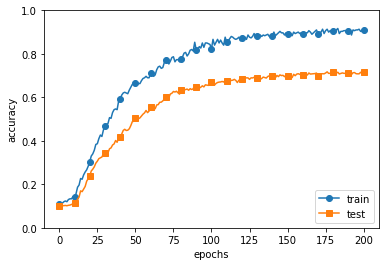

In [7]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 为导入父目录中的文件而进行的设置
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了重现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# 设置weight decay（权重衰减） =======================
# weight_decay_lambda = 0 # 不使用weight decay的情况
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# dropout

https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/overfit_dropout.py

train loss:2.2940388257875033
=== epoch:1, train acc:0.08333333333333333, test acc:0.1032 ===
train loss:2.308232859975659
train loss:2.3103346159001243
train loss:2.2997437891101793
=== epoch:2, train acc:0.08666666666666667, test acc:0.1044 ===
train loss:2.2990201182070833
train loss:2.3063753163964673
train loss:2.301757694719673
=== epoch:3, train acc:0.08666666666666667, test acc:0.1085 ===
train loss:2.289907493579498
train loss:2.3001036707568727
train loss:2.3065279836350445
=== epoch:4, train acc:0.08666666666666667, test acc:0.1104 ===
train loss:2.3011571609762025
train loss:2.302940677033991
train loss:2.307538649520236
=== epoch:5, train acc:0.09, test acc:0.1104 ===
train loss:2.3007307039051046
train loss:2.291755477734266
train loss:2.3038531548484884
=== epoch:6, train acc:0.10333333333333333, test acc:0.1121 ===
train loss:2.294566543524385
train loss:2.3052050176727747
train loss:2.300792401627994
=== epoch:7, train acc:0.11666666666666667, test acc:0.1142 ===
train

=== epoch:56, train acc:0.27666666666666667, test acc:0.2346 ===
train loss:2.2540982893355905
train loss:2.2523575474401856
train loss:2.2382248665400364
=== epoch:57, train acc:0.2833333333333333, test acc:0.2294 ===
train loss:2.2680256659301925
train loss:2.25106843490167
train loss:2.246856310448618
=== epoch:58, train acc:0.2833333333333333, test acc:0.235 ===
train loss:2.2208335723115753
train loss:2.247160006058844
train loss:2.233602159055075
=== epoch:59, train acc:0.2866666666666667, test acc:0.236 ===
train loss:2.2527706932962626
train loss:2.2444268530140667
train loss:2.275639557917651
=== epoch:60, train acc:0.2866666666666667, test acc:0.2344 ===
train loss:2.238042764591466
train loss:2.2530785116411187
train loss:2.2471487005124753
=== epoch:61, train acc:0.2866666666666667, test acc:0.2401 ===
train loss:2.2519439456511083
train loss:2.2227210095272674
train loss:2.240754767804656
=== epoch:62, train acc:0.2966666666666667, test acc:0.243 ===
train loss:2.255577653

=== epoch:112, train acc:0.36666666666666664, test acc:0.3035 ===
train loss:2.093672023480318
train loss:2.182533261989657
train loss:2.142059259377817
=== epoch:113, train acc:0.3566666666666667, test acc:0.2997 ===
train loss:2.1910712892464748
train loss:2.136120359652369
train loss:2.149411955162862
=== epoch:114, train acc:0.36333333333333334, test acc:0.3026 ===
train loss:2.130463106018682
train loss:2.1456786289268526
train loss:2.1331480738086936
=== epoch:115, train acc:0.36333333333333334, test acc:0.303 ===
train loss:2.1432157005892565
train loss:2.180516082406969
train loss:2.1705505080841294
=== epoch:116, train acc:0.37, test acc:0.3057 ===
train loss:2.1608279614214503
train loss:2.158276306488213
train loss:2.0984287042367655
=== epoch:117, train acc:0.37, test acc:0.3084 ===
train loss:2.0860976064463266
train loss:2.1258847920971444
train loss:2.156240298208153
=== epoch:118, train acc:0.36, test acc:0.3031 ===
train loss:2.1230979563973587
train loss:2.15364311867

=== epoch:167, train acc:0.5333333333333333, test acc:0.4117 ===
train loss:1.8807294669335914
train loss:1.973508411560971
train loss:2.0354096850637204
=== epoch:168, train acc:0.5333333333333333, test acc:0.4135 ===
train loss:1.8900315108070425
train loss:1.9307757252088293
train loss:2.009960131032277
=== epoch:169, train acc:0.5366666666666666, test acc:0.41 ===
train loss:1.9780708691721203
train loss:1.8538066412003302
train loss:1.9142305004006122
=== epoch:170, train acc:0.53, test acc:0.4101 ===
train loss:1.995673646520411
train loss:1.8956134452539315
train loss:1.956321165307772
=== epoch:171, train acc:0.5233333333333333, test acc:0.4124 ===
train loss:1.8634261750305305
train loss:1.9587078042977177
train loss:1.9150976216606697
=== epoch:172, train acc:0.52, test acc:0.4097 ===
train loss:1.980279784453942
train loss:1.903121153671874
train loss:1.976911637009236
=== epoch:173, train acc:0.5266666666666666, test acc:0.4081 ===
train loss:1.9165134613035135
train loss:1

=== epoch:222, train acc:0.59, test acc:0.4488 ===
train loss:1.6616899836534826
train loss:1.7280742994804714
train loss:1.7379793379590394
=== epoch:223, train acc:0.5933333333333334, test acc:0.453 ===
train loss:1.739521651233649
train loss:1.6629568565295154
train loss:1.7275880688654193
=== epoch:224, train acc:0.5933333333333334, test acc:0.4578 ===
train loss:1.7298314067357012
train loss:1.6671879155520852
train loss:1.623546772979323
=== epoch:225, train acc:0.5966666666666667, test acc:0.4548 ===
train loss:1.6598364738053208
train loss:1.6073278684824055
train loss:1.6970573527375257
=== epoch:226, train acc:0.59, test acc:0.4531 ===
train loss:1.7601016490007941
train loss:1.7342836834950424
train loss:1.5957049545585935
=== epoch:227, train acc:0.5966666666666667, test acc:0.4544 ===
train loss:1.6650547093929418
train loss:1.8427239670695243
train loss:1.633299521940792
=== epoch:228, train acc:0.59, test acc:0.4587 ===
train loss:1.7164912828433707
train loss:1.64020377

=== epoch:278, train acc:0.67, test acc:0.525 ===
train loss:1.4752879261815288
train loss:1.3670785942514967
train loss:1.393251224833496
=== epoch:279, train acc:0.6666666666666666, test acc:0.5301 ===
train loss:1.3153082228701591
train loss:1.4051330071163313
train loss:1.3778609502917942
=== epoch:280, train acc:0.67, test acc:0.531 ===
train loss:1.4778113460365967
train loss:1.304002919961053
train loss:1.2736098563074014
=== epoch:281, train acc:0.6733333333333333, test acc:0.5319 ===
train loss:1.4145567512280448
train loss:1.3020489910329713
train loss:1.3555116670481708
=== epoch:282, train acc:0.6766666666666666, test acc:0.5355 ===
train loss:1.2794324195827713
train loss:1.207383460367849
train loss:1.3150958785866038
=== epoch:283, train acc:0.6766666666666666, test acc:0.5336 ===
train loss:1.4318969659515934
train loss:1.2771091416937113
train loss:1.3685135908478951
=== epoch:284, train acc:0.6766666666666666, test acc:0.5373 ===
train loss:1.3067810569734717
train lo

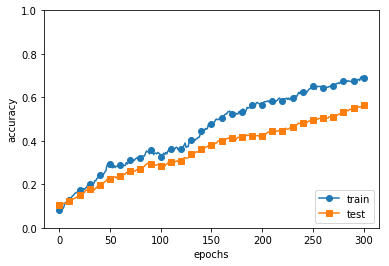

In [8]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 为导入父目录中的文件而进行的设置
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了重现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuout有无、比例的设置 ========================
use_dropout = True  # 不使用Dropout时修改为False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 超参数优化

https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/hyperparameter_optimization.py

val acc:0.2 | lr:0.0007769588213494039, weight decay:5.57176176211697e-07
val acc:0.09 | lr:1.3267256882921564e-06, weight decay:5.5752601203992484e-05
val acc:0.38 | lr:0.002504605960206648, weight decay:2.0202842319040335e-08
val acc:0.23 | lr:0.0008027405772779653, weight decay:4.0924190556214115e-08
val acc:0.14 | lr:0.0007483691319670275, weight decay:3.756941308098675e-08
val acc:0.1 | lr:7.536899240905146e-06, weight decay:6.030129778228275e-08
val acc:0.12 | lr:1.1912606390468455e-05, weight decay:5.118911336172855e-06
val acc:0.12 | lr:4.607219519807864e-06, weight decay:8.072011260050135e-07
val acc:0.24 | lr:0.0017525745882844492, weight decay:4.1116141319315954e-08
val acc:0.16 | lr:2.329540878455772e-05, weight decay:2.513560161478032e-07
val acc:0.22 | lr:0.0014971366110986379, weight decay:3.384077905156224e-07
val acc:0.42 | lr:0.003537235885586346, weight decay:1.9771329007723216e-07
val acc:0.09 | lr:0.0001163661382149746, weight decay:2.0834277866463343e-08
val acc:0

Best-16(val acc:0.31) | lr:0.0007123541073071506, weight decay:2.0479421066247043e-05
Best-17(val acc:0.28) | lr:0.0010649941529204936, weight decay:5.365355335264311e-05
Best-18(val acc:0.27) | lr:0.0012618198190772704, weight decay:9.670098378187491e-05
Best-19(val acc:0.26) | lr:0.0017224459141046927, weight decay:3.342865122530131e-05
Best-20(val acc:0.24) | lr:0.0017525745882844492, weight decay:4.1116141319315954e-08


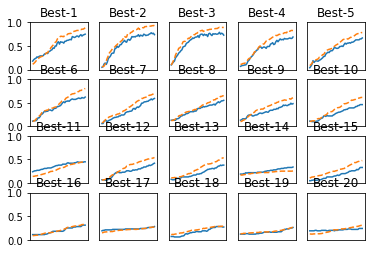

In [9]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)   # 为导入父目录中的文件而进行的设置
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了加快速度，减少训练数据
x_train = x_train[:500]
t_train = t_train[:500]

# 分离验证数据
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 随机探索超参数======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 指定探索的超参数的范围===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 绘制图表========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()